In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/hashing

# Лабораторная работа
выполнил: Аросланкин Артем

## Хеширование цепочкамии

## Хеширование с открытой адресацией
### Выбор емкости таблицы
Емкость должна быть не меньше чем число элементов, так как $n+1$ элемент будет некуда положить.  
  
Выбор оптимального значения для емкости.  
  
Вставка элемента в хеш-таблицу с открытой адресацией и коэффициентом заполнения $а = n/capacity$ в предположении равномерного хеширования требует в среднем не более $1/(1 — a)$ исследований.  
Одно исследование выполняется всегда. С вероятностью, приблизительно равной $a$, первое исследование проводится над заполненной ячейкой,
и требуется выполнение второго исследования. С вероятностью, приблизительно
равной $a^2$, две первые ячейки оказываются заполненными, и требуется проведение третьего исследования, и т.д.  
Если а — константа, то теорема (Кормен, открытая адресация) предсказывает, что неудачный поиск выполняется за время $0(1)$. Например, если хеш-таблица заполнена наполовину, то среднее количество исследований при неудачном поиске не превышает $1/(1 — .5) = 2$. При заполненности хеш-таблицы на $90$% среднее количество
исследований не превышает $1/(1 — .9) = 10$.  
Для данной лабораторной работы предлагаю взять только $capacity=2*n$. Так как при полной заполненности получим очень высокое количество проб.

## Хеширование Кукушки

https://web.stanford.edu/class/archive/cs/cs166/cs166.1146/lectures/13/Small13.pdf

Основная идея хеширования кукушки — использование двух хеш-функций вместо одной (далее h1(x) и h2(x)). Также есть вариант алгоритма, в котором используются две хеш-таблицы, и первая хеш-функция указывает на ячейку из первой таблицы, а вторая — из второй. Рассмотрим алгоритмы функций add(x),remove(x) и contains(x).

Выберем 2 хэш-функции h1(x) и h2(x) (из универсального семейства хэш-функций).  
  
### Insert 
Добавляет элемент с ключом x в хэш-таблицу

1. Если одна из ячеек с индексами h1(x) или h2(x) свободна, кладем в нее элемент.
2. Иначе произвольно выбираем одну из этих ячеек, запоминаем элемент, который там находится, помещаем туда новый.  
3. Смотрим в ячейку, на которую указывает другая хеш-функция от элемента, который запомнили, если она свободна, помещаем его в нее.  
4. Иначе запоминаем элемент из этой ячейки, кладем туда старый. Проверяем, не зациклились ли мы.  
5. Если не зациклились, то продолжаем данную процедуру поиска свободного места пока не найдем свободное место или зациклимся.  
6. Иначе выбираем 2 новые хеш-функции и перехешируем все добавленные элементы.  
7. Также после добавления нужно увеличить размер таблицы в случае если она заполнена.  

### Remove. 
Удаляет элемент с ключом x из хэш-таблицы.

1. Смотрим ячейки с индексами h1(x) и h2(x).
2. Если в одной из них есть искомый элемент, просто помечаем эту ячейку как свободную.
  
### Search
Проверяет на наличие элемента x в хэш-таблице

1. Смотрим ячейки с индексами h1(x) и h2(x).
2. Если в одной из них есть искомый элемент, возвращаем true.
3. Иначе возвращаем false.  

## Summary

Исследования, проведённые Жуковским, Хеманом и Бонзом, показали, что кукушкино хеширование существенно быстрее метода цепочек для малых хеш-таблиц, находящихся в кэше современных процессоров.   
  
Самый большой минуc — потраченная память. Чтобы гарантировать по времени, нужно чтобы пары ключ/значение занимали не более 50% памяти (тоже самое, что и для обычной открытой адресации), потому что вытеснение старых элементов становится трудоемким.   
  
  Также, добавление каждой новой хеш-функции значительно увеличивает среднюю скорость заполнения таблицы.


In [230]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_graph(df, name ):
    df.plot(x='size', y=df.columns[1:], grid=True, figsize=(16, 7))
    plt.title(name)
    plt.ylabel('Average Time (micros)')

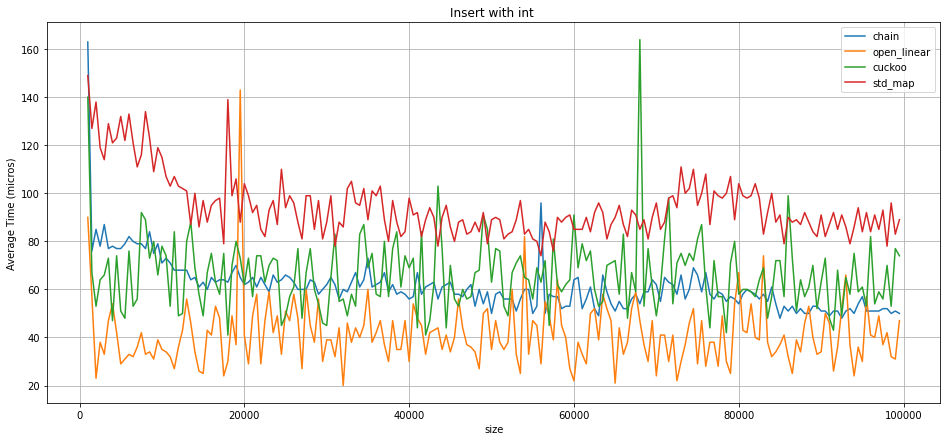

In [231]:
plot_graph(pd.read_csv('insert.csv', index_col = 0), 'Insert with int ')

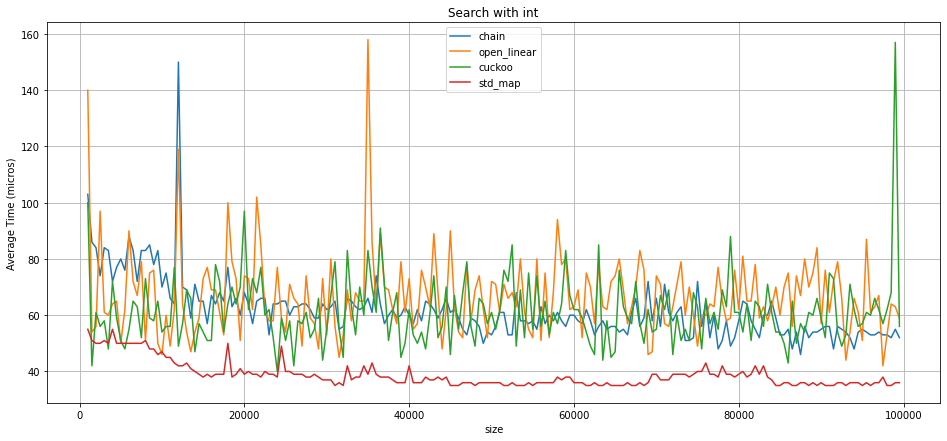

In [232]:
plot_graph(pd.read_csv('search.csv', index_col = 0), 'Search with int')

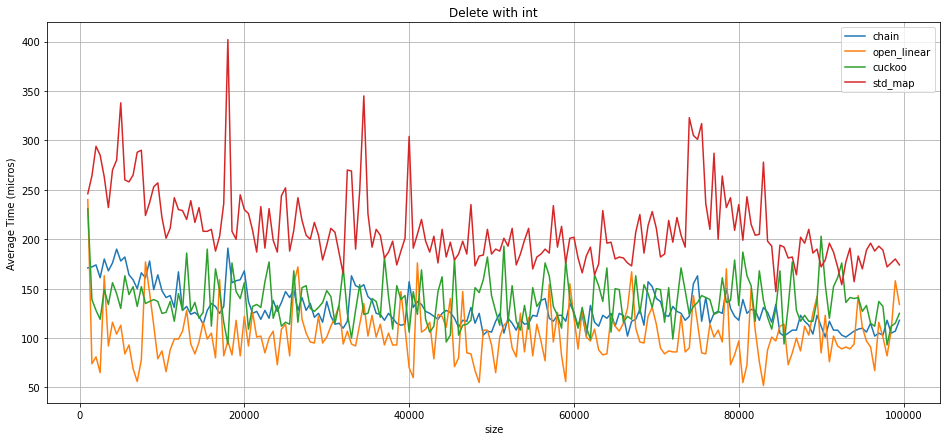

In [233]:
plot_graph(pd.read_csv('remove.csv', index_col = 0), 'Delete with int')

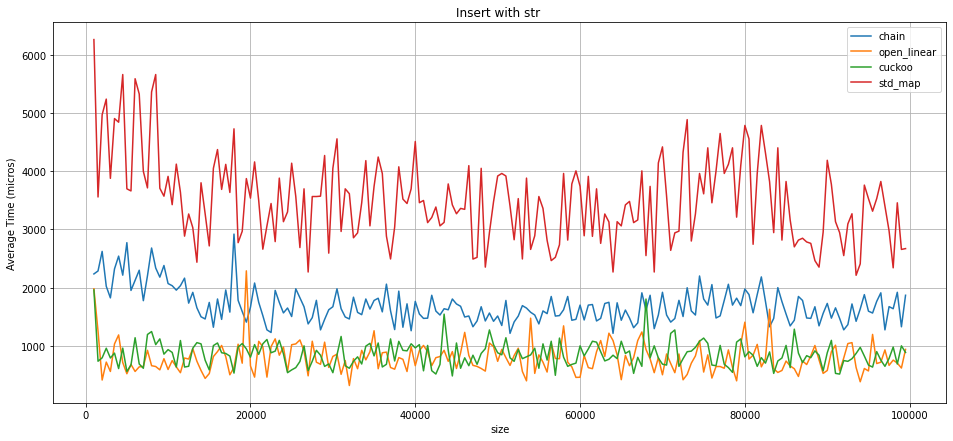

In [234]:
plot_graph(pd.read_csv('insert_string.csv', index_col = 0), 'Insert with str ')

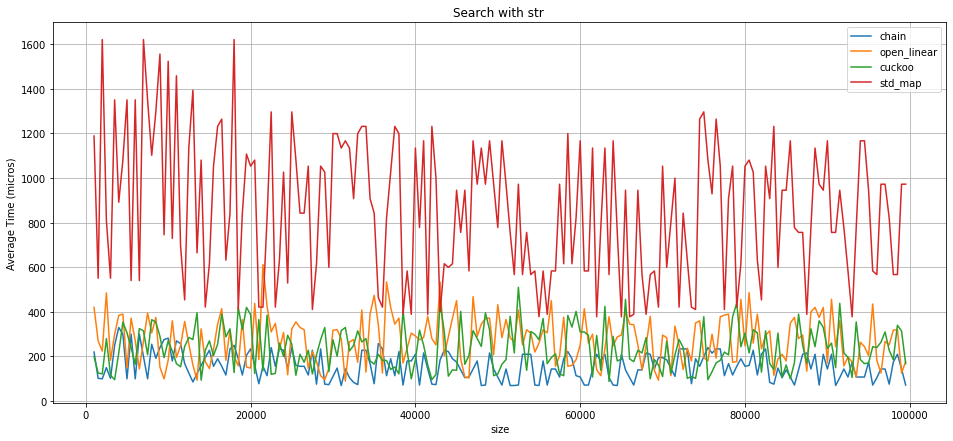

In [235]:
plot_graph(pd.read_csv('search_string.csv', index_col=0), 'Search with str ')

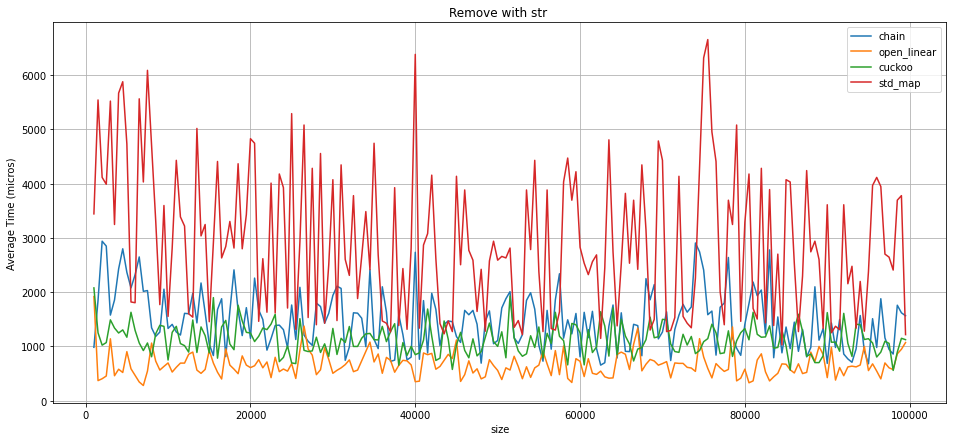

In [236]:
plot_graph(pd.read_csv('remove_string.csv', index_col = 0), 'Remove with str ')